In [101]:
import numpy as np
import pandas as pd # data processing, CSV file 1/0 (e.g. pd.read_csv)
import matplotlib as plt
import matplotlib.pyplot as plt #Data Visualisation
import seaborn as sns # Data Visualisation
from collections import Counter as c #importing collections
from matplotlib.pyplot import plot #importing matplotlib Llibrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
df = pd.read_csv("h1b_kaggle.csv")
df.shape
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [104]:
df.CASE_STATUS.value_counts()

CASE_STATUS
CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: count, dtype: int64

In [105]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

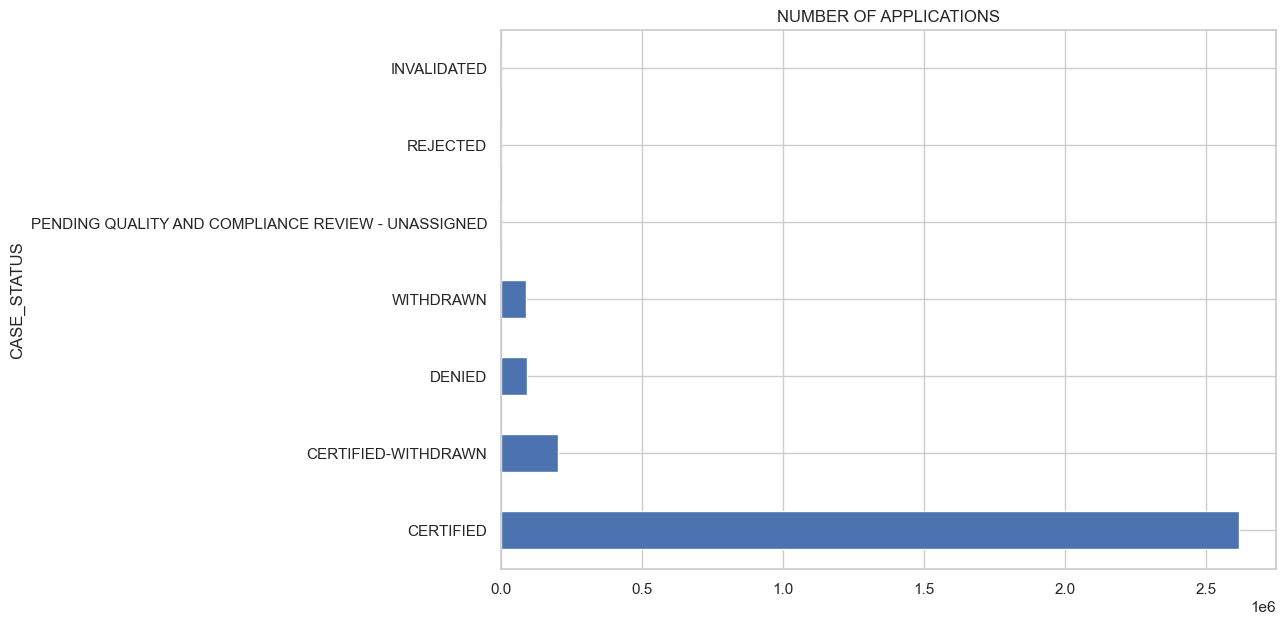

In [106]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show

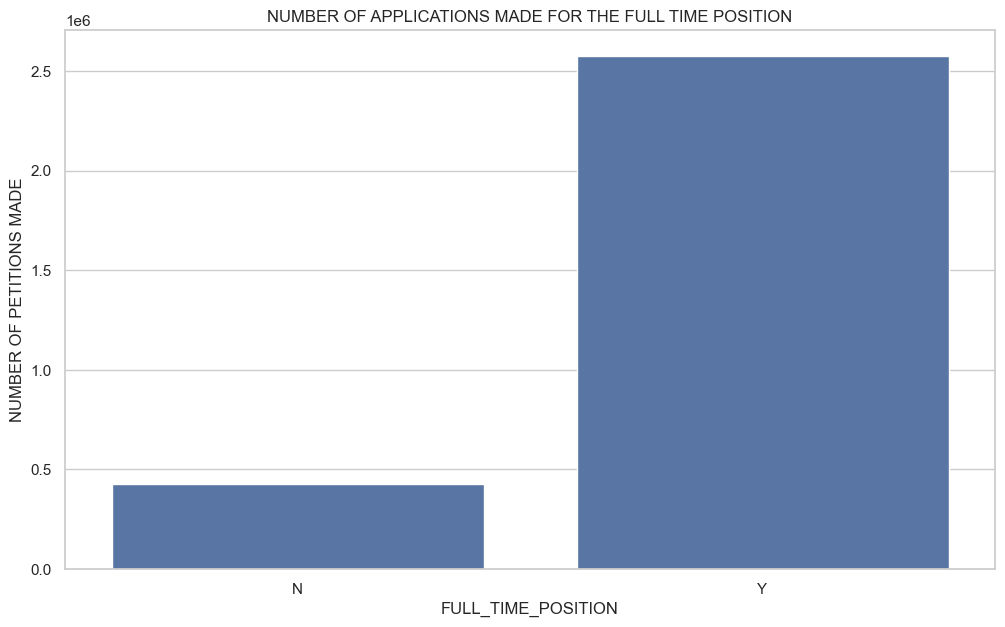

In [107]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [108]:
top_emp = df['EMPLOYER_NAME'].value_counts().nlargest(5).index.tolist()

df = df [df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df [['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']] [df['EMPLOYER_NAME'].isin(top_emp)]
# Group by the columns and reset the index to bring the grouping columns back as regular columns.
by_emp_year = by_emp_year.groupby(['EMPLOYER_NAME', 'YEAR']).mean().reset_index()
print(by_emp_year['EMPLOYER_NAME'])

0               DELOITTE CONSULTING LLP
1               DELOITTE CONSULTING LLP
2               DELOITTE CONSULTING LLP
3               DELOITTE CONSULTING LLP
4               DELOITTE CONSULTING LLP
5               DELOITTE CONSULTING LLP
6             IBM INDIA PRIVATE LIMITED
7             IBM INDIA PRIVATE LIMITED
8             IBM INDIA PRIVATE LIMITED
9             IBM INDIA PRIVATE LIMITED
10            IBM INDIA PRIVATE LIMITED
11            IBM INDIA PRIVATE LIMITED
12                      INFOSYS LIMITED
13                      INFOSYS LIMITED
14                      INFOSYS LIMITED
15                      INFOSYS LIMITED
16                      INFOSYS LIMITED
17                      INFOSYS LIMITED
18    TATA CONSULTANCY SERVICES LIMITED
19    TATA CONSULTANCY SERVICES LIMITED
20    TATA CONSULTANCY SERVICES LIMITED
21    TATA CONSULTANCY SERVICES LIMITED
22    TATA CONSULTANCY SERVICES LIMITED
23    TATA CONSULTANCY SERVICES LIMITED
24                        WIPRO LIMITED


In [109]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [110]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

In [111]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED':0, 'CERTIFIED-WITHDRAWN': 1, 'DENIED': 2, 'WITHDRAWN': 3, 'PENDING QUALITY AND COMPLIANCE REVIEW UNASSIGNED' : 4,
'REJECTED': 5, 'INVALIDATED': 6})

In [112]:
df['FULL_TIME_POSITION'] = df ['FULL_TIME_POSITION'].map({'N' : 0, 'Y': 1})
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,1.0,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,1.0,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,1.0,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,1.0,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,3.0,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [113]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('computer', 'software')] = 'it'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('chief', 'management')] = 'manager'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales', 'market')] = 'scm'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('public', 'fundraising')] = 'pr'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('education', 'law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors', 'compliance')] = 'audit'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('distribution', 'logistics')] = 'scm'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains ('recruiters', 'human')] = 'hr'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('agricultural', 'farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction', 'architectural')] = 'estate'
df['SOC_NAME1'] [df['SOC_NAME'].str.contains('forencsic', 'health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'

C:\Users\sushm\AppData\Local\Temp\ipykernel_25128\2877348365.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['SOC_NAME1'] [df['SOC_NAME'].str.contains('computer', 'software')] = 'it'
C:\Users\sushm\AppData\Local\Temp\ipykernel_25128\2

In [114]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE','WORKSITE', 'lon', 'lat'], axis = 1)

In [115]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
#print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [116]:
df = df.drop(['SOC_NAME1'], axis=1)

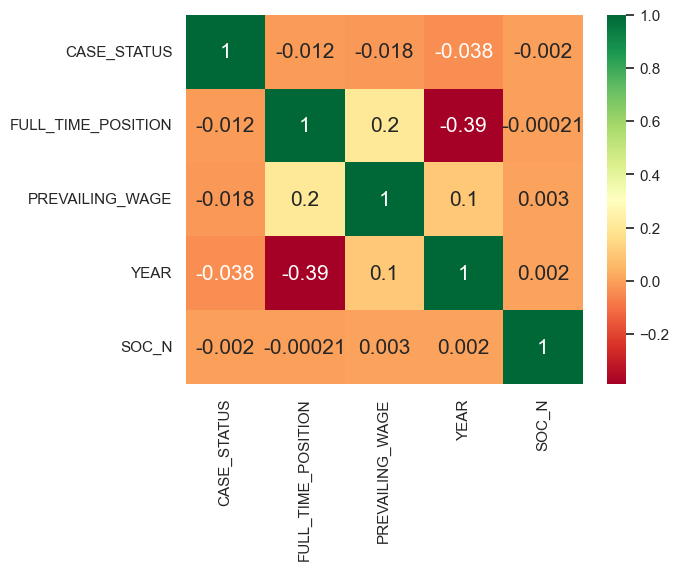

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a valid colormap name
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

In [118]:
df['CASE_STATUS'] = df['CASE_STATUS'].fillna(df['CASE_STATUS'].mode()[0])

In [119]:
selcols=["FULL_TIME_POSITION", "PREVAILING_WAGE", "YEAR", "SOC_N"]
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['CASE_STATUS'])

In [120]:
x.columns

Index(['FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'SOC_N'], dtype='object')

In [121]:
x.head(10)


,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,0,36067.0,2016.0,2
1,1,242674.0,2016.0,2
2,1,193066.0,2016.0,2
3,1,220314.0,2016.0,2
4,1,157518.4,2016.0,2
5,1,225000.0,2016.0,2
6,1,91021.0,2016.0,2
7,1,150000.0,2016.0,2
8,1,127546.0,2016.0,2
9,1,154648.0,2016.0,2


In [122]:
uni=x['SOC_N'].unique()
print(uni)

[2 1 0]


In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [124]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier()
rf.fit(x_train, y_train)

DecisionTreeClassifier()

In [125]:
y_pred_rf =rf.predict(x_test)
print(y_pred_rf)

[0. 0. 0. ... 0. 0. 0.]


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    784464
         1.0       0.49      0.09      0.15     60711
         2.0       0.25      0.03      0.06     27545
         3.0       0.16      0.01      0.01     27253
         6.0       0.00      0.00      0.00         1

    accuracy                           0.87    899974
   macro avg       0.35      0.22      0.23    899974
weighted avg       0.81      0.87      0.82    899974



c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [127]:
c(y_pred_rf)

Counter({np.float64(0.0): 883608,
         np.float64(1.0): 11260,
         np.float64(2.0): 3791,
         np.float64(3.0): 1315})

In [128]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.8698217948518513

In [129]:
import pickle
pickle.dump(rf,open('Visarf.pkl','wb'))